In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('SalaryData.csv')
df.head(20)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [3]:
df.shape

(40, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [6]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [7]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [8]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [9]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [10]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


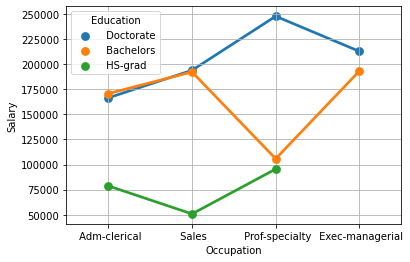

In [11]:
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education',data=df,ci=None)
plt.grid()
plt.show()

In [12]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


In [13]:
model=ols('Salary ~C(Education)+C(Occupation)+C(Education):C(Occupation)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [98]:
df11=pd.read_csv('Education+-+Post+12th+Standard.csv')
df11.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [99]:
df11.shape

(777, 18)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [17]:
df1.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [18]:
df1.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [19]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [20]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


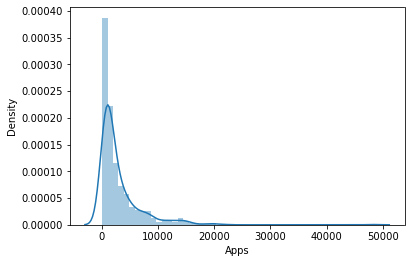

In [21]:
sns.distplot(df1['Apps']);

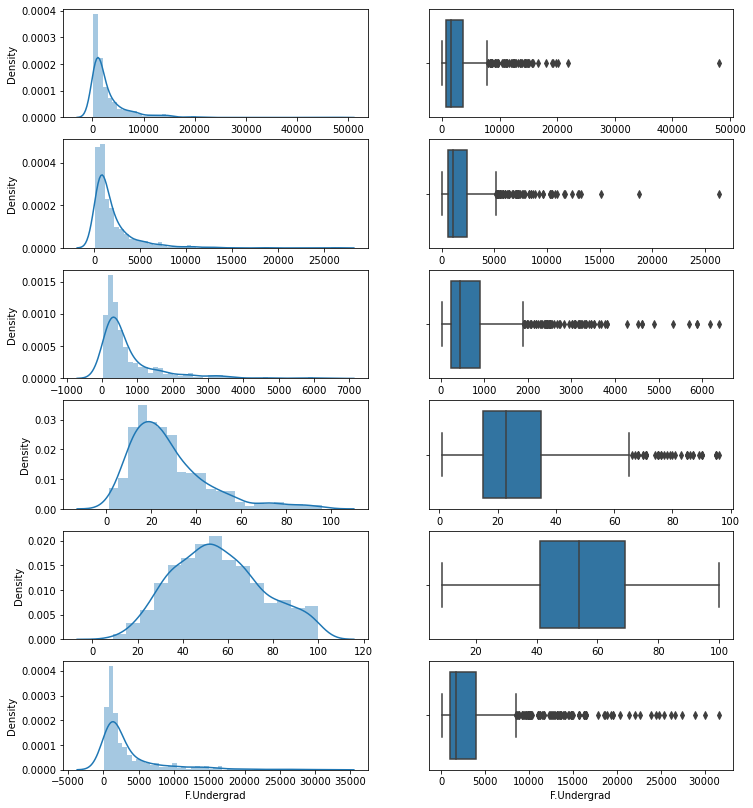

In [22]:
fig,axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,14);


sns.distplot(df1['Apps'],ax=axes[0][0])
sns.boxplot(df1['Apps'],orient='H',ax=axes[0][1])

sns.distplot(df1['Accept'],ax=axes[1][0])
sns.boxplot(df1['Accept'],orient='H',ax=axes[1][1])

sns.distplot(df1['Enroll'],ax=axes[2][0])
sns.boxplot(df1['Enroll'],orient='H',ax=axes[2][1])

sns.distplot(df1['Top10perc'],ax=axes[3][0])
sns.boxplot(df1['Top10perc'],orient='H',ax=axes[3][1])

sns.distplot(df1['Top25perc'],ax=axes[4][0])
sns.boxplot(df1['Top25perc'],orient='H',ax=axes[4][1])

sns.distplot(df1['F.Undergrad'],ax=axes[5][0])
sns.boxplot(df1['F.Undergrad'],orient='H',ax=axes[5][1]);

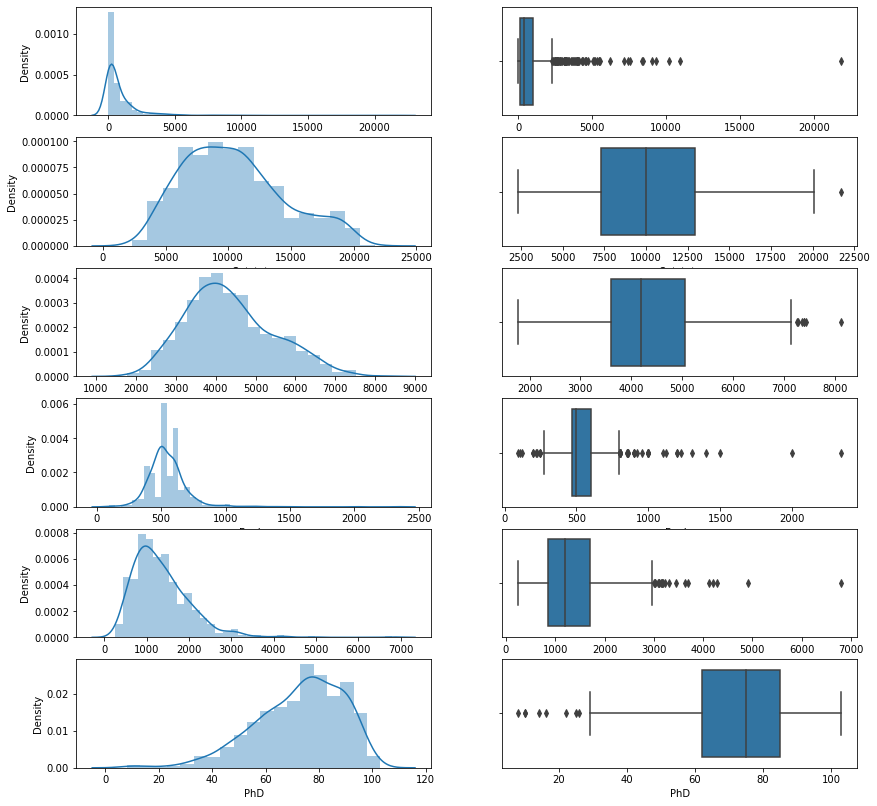

In [23]:
fig,axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(14,14)


sns.distplot(df1['P.Undergrad'],ax=axes[0][0])
sns.boxplot(df1['P.Undergrad'],orient='V',ax=axes[0][1])

sns.distplot(df1['Outstate'],ax=axes[1][0])
sns.boxplot(df1['Outstate'],orient='H',ax=axes[1][1])

sns.distplot(df1['Room.Board'],ax=axes[2][0])
sns.boxplot(df1['Room.Board'],orient='H',ax=axes[2][1])

sns.distplot(df1['Books'],ax=axes[3][0])
sns.boxplot(df1['Books'],orient='H',ax=axes[3][1])

sns.distplot(df1['Personal'],ax=axes[4][0])
sns.boxplot(df1['Personal'],orient='H',ax=axes[4][1])

sns.distplot(df1['PhD'],ax=axes[5][0])
sns.boxplot(df1['PhD'],orient='V',ax=axes[5][1]);

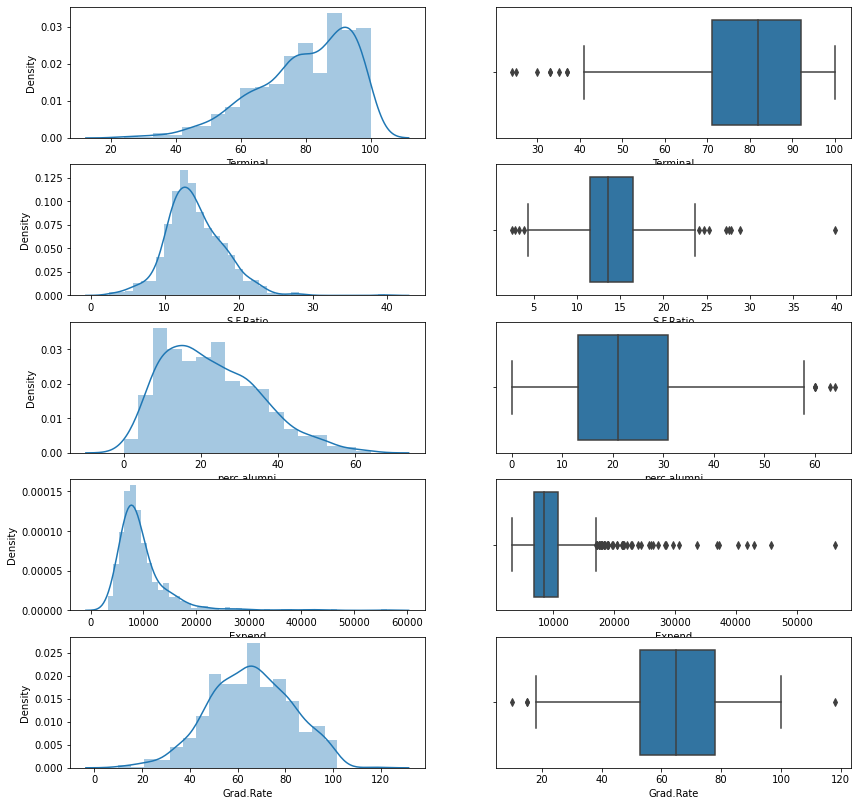

In [24]:
fig,axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14,14)


sns.distplot(df1['Terminal'],ax=axes[0][0])
sns.boxplot(df1['Terminal'],orient='V',ax=axes[0][1])

sns.distplot(df1['S.F.Ratio'],ax=axes[1][0])
sns.boxplot(df1['S.F.Ratio'],orient='H',ax=axes[1][1])

sns.distplot(df1['perc.alumni'],ax=axes[2][0])
sns.boxplot(df1['perc.alumni'],orient='H',ax=axes[2][1])

sns.distplot(df1['Expend'],ax=axes[3][0])
sns.boxplot(df1['Expend'],orient='H',ax=axes[3][1])

sns.distplot(df1['Grad.Rate'],ax=axes[4][0])
sns.boxplot(df1['Grad.Rate'],orient='H',ax=axes[4][1]);



In [96]:
df1.skew(axis=0)

Apps           1.166334
Accept         1.151199
Enroll         1.155018
Top10perc      0.880389
Top25perc      0.259340
F.Undergrad    1.149049
P.Undergrad    1.166203
Outstate       0.507441
Room.Board     0.442530
Books          0.239716
Personal       0.792012
PhD           -0.606822
Terminal      -0.710578
S.F.Ratio      0.266828
perc.alumni    0.572760
Expend         0.875535
Grad.Rate     -0.106733
dtype: float64

In [100]:
df1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

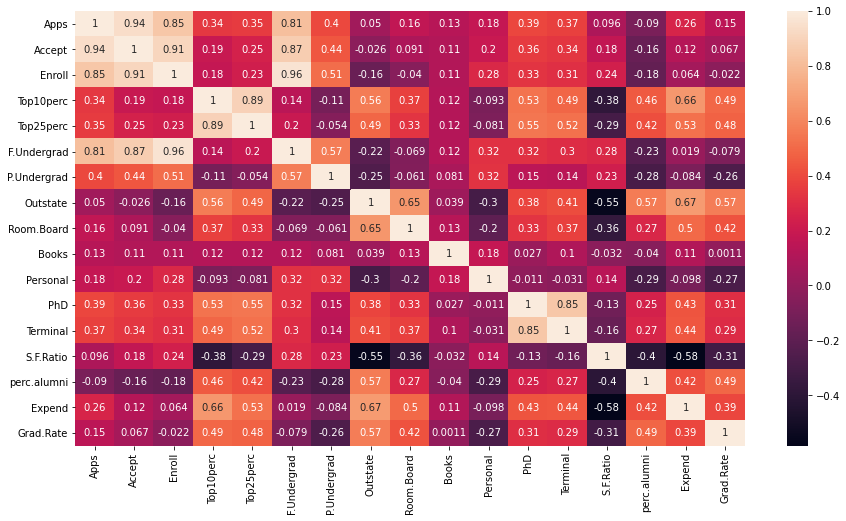

In [101]:
plt.subplots(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

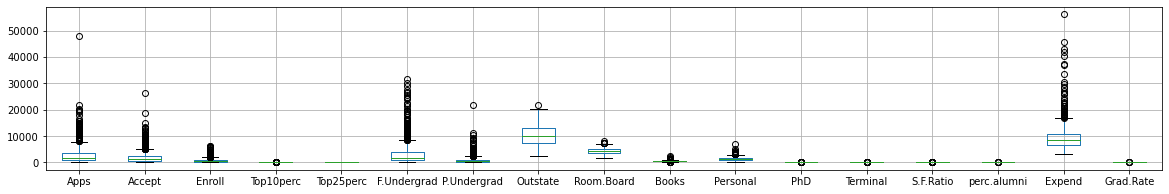

In [25]:
df1.boxplot(figsize=(20,3))

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [27]:
lrapps,urapps=remove_outlier(df1['Apps'])
df1['Apps']=np.where(df1['Apps']>urapps,urapps,df1['Apps'])
df1['Apps']=np.where(df1['Apps']<lrapps,lrapps,df1['Apps'])

lraccept,uraccept=remove_outlier(df1['Accept'])
df1['Accept']=np.where(df1['Accept']>uraccept,uraccept,df1['Accept'])
df1['Accept']=np.where(df1['Accept']<lraccept,lraccept,df1['Accept'])

lrenroll,urenroll=remove_outlier(df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']>urenroll,urenroll,df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']<lrenroll,lrenroll,df1['Enroll'])

lrtop10,urtop10=remove_outlier(df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']>urtop10,urtop10,df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']<lrtop10,lrtop10,df1['Top10perc'])

lrfund,urfund=remove_outlier(df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']>urfund,urfund,df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']<lrfund,lrfund,df1['F.Undergrad'])

lrpund,urpund=remove_outlier(df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']>urpund,urpund,df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']<lrpund,lrpund,df1['P.Undergrad'])

lrout,urout=remove_outlier(df1['Outstate'])
df1['Outstate']=np.where(df1['Outstate']>urout,urout,df1['Outstate'])
df1['Outstate']=np.where(df1['Outstate']<lrout,lrout,df1['Outstate'])

lrroom,urroom=remove_outlier(df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']>urroom,urroom,df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']<lrroom,lrroom,df1['Room.Board'])

lrbooks,urbooks=remove_outlier(df1['Books'])
df1['Books']=np.where(df1['Books']>urbooks,urbooks,df1['Books'])
df1['Books']=np.where(df1['Books']<lrbooks,lrbooks,df1['Books'])

lrpersonal,urpersonal=remove_outlier(df1['Personal'])
df1['Personal']=np.where(df1['Personal']>urpersonal,urpersonal,df1['Personal'])
df1['Personal']=np.where(df1['Personal']<lrpersonal,lrpersonal,df1['Personal'])

lrPhD,urPhD=remove_outlier(df1['PhD'])
df1['PhD']=np.where(df1['PhD']>urPhD,urPhD,df1['PhD'])
df1['PhD']=np.where(df1['PhD']<lrPhD,lrPhD,df1['PhD'])

lrTerminal,urTerminal=remove_outlier(df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']>urTerminal,urTerminal,df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']<lrTerminal,lrTerminal,df1['Terminal'])

lrRatio,urRatio=remove_outlier(df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']>urRatio,urRatio,df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']<lrRatio,lrRatio,df1['S.F.Ratio'])

lralumni,uralumni=remove_outlier(df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']>uralumni,uralumni,df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']<lralumni,lralumni,df1['perc.alumni'])

lrExpend,urExpend=remove_outlier(df1['Expend'])
df1['Expend']=np.where(df1['Expend']>urExpend,urExpend,df1['Expend'])
df1['Expend']=np.where(df1['Expend']<lrExpend,lrExpend,df1['Expend'])

lrGRate,urGRate=remove_outlier(df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']>urGRate,urGRate,df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']<lrGRate,lrGRate,df1['Grad.Rate'])


df1.shape

(777, 18)

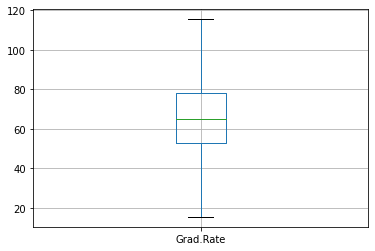

In [28]:
df1.boxplot(column=['Grad.Rate'])
plt.show()

<AxesSubplot:>

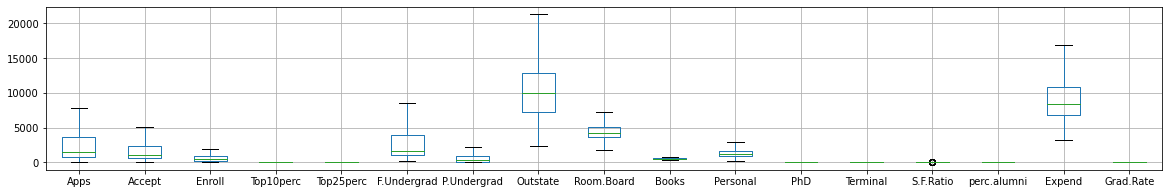

In [41]:
df1.boxplot(figsize=(20,3))

In [43]:
df2=df1.drop(['Names'],axis=1)
df2.head()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,1.070602,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,39.5,-0.489511,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,-0.304413,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,-1.679429,37.0,16948.5,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,795.0,1500.0,76.0,72.0,-0.568839,2.0,10922.0,15.5


In [45]:
from scipy.stats import zscore
df3=df2.apply(zscore)
df3.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


In [46]:
cov_mat = pd.DataFrame.cov(df3)
cov_mat

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.956538,0.898039,0.321756,0.364961,0.862111,0.520493,0.065421,0.187717,0.236442,0.230244,0.464522,0.435038,0.126574,-0.101288,0.243248,0.150998
Accept,0.956538,1.001289,0.936482,0.223586,0.274033,0.898190,0.573429,-0.005009,0.119740,0.208974,0.256676,0.427891,0.403929,0.188749,-0.165729,0.162017,0.079084
Enroll,0.898039,0.936482,1.001289,0.171977,0.230731,0.968549,0.642422,-0.155856,-0.023876,0.202317,0.339785,0.382031,0.354836,0.274622,-0.223010,0.054291,-0.023281
Top10perc,0.321756,0.223586,0.171977,1.001289,0.915053,0.111358,-0.180241,0.562884,0.357826,0.153650,-0.116880,0.544749,0.507401,-0.388426,0.456384,0.657886,0.494307
Top25perc,0.364961,0.274033,0.230731,0.915053,1.001289,0.181429,-0.099423,0.490200,0.331413,0.169980,-0.086922,0.552172,0.528334,-0.297616,0.417369,0.573643,0.479602
F.Undergrad,0.862111,0.898190,0.968549,0.111358,0.181429,1.001289,0.697027,-0.226457,-0.054546,0.208147,0.360246,0.362030,0.335486,0.324922,-0.285825,0.000371,-0.082345
P.Undergrad,0.520493,0.573429,0.642422,-0.180241,-0.099423,0.697027,1.001289,-0.354673,-0.067725,0.122686,0.344496,0.127827,0.122309,0.371085,-0.419874,-0.202189,-0.265499
Outstate,0.065421,-0.005009,-0.155856,0.562884,0.490200,-0.226457,-0.354673,1.001289,0.656334,0.005117,-0.326029,0.391825,0.413110,-0.574422,0.566465,0.776327,0.573196
Room.Board,0.187717,0.119740,-0.023876,0.357826,0.331413,-0.054546,-0.067725,0.656334,1.001289,0.109065,-0.219837,0.341909,0.379759,-0.376915,0.272744,0.581370,0.426339
Books,0.236442,0.208974,0.202317,0.153650,0.169980,0.208147,0.122686,0.005117,0.109065,1.001289,0.240172,0.136566,0.159523,-0.008547,-0.042887,0.150177,-0.008061


In [47]:
cov_matrix = np.cov(df3.T)
cov_matrix

array([[ 1.00128866e+00,  9.56537704e-01,  8.98039052e-01,
         3.21756324e-01,  3.64960691e-01,  8.62111140e-01,
         5.20492952e-01,  6.54209711e-02,  1.87717056e-01,
         2.36441941e-01,  2.30243993e-01,  4.64521757e-01,
         4.35037784e-01,  1.26573895e-01, -1.01288006e-01,
         2.43248206e-01,  1.50997775e-01],
       [ 9.56537704e-01,  1.00128866e+00,  9.36482483e-01,
         2.23586208e-01,  2.74033187e-01,  8.98189799e-01,
         5.73428908e-01, -5.00874847e-03,  1.19740419e-01,
         2.08974091e-01,  2.56676290e-01,  4.27891234e-01,
         4.03929238e-01,  1.88748711e-01, -1.65728801e-01,
         1.62016688e-01,  7.90839722e-02],
       [ 8.98039052e-01,  9.36482483e-01,  1.00128866e+00,
         1.71977357e-01,  2.30730728e-01,  9.68548601e-01,
         6.42421828e-01, -1.55856056e-01, -2.38762560e-02,
         2.02317274e-01,  3.39785395e-01,  3.82031198e-01,
         3.54835877e-01,  2.74622251e-01, -2.23009677e-01,
         5.42906862e-02, -2.3

In [108]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df3)
kmo_model

0.8494624668231414

In [51]:
df3.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


<AxesSubplot:>

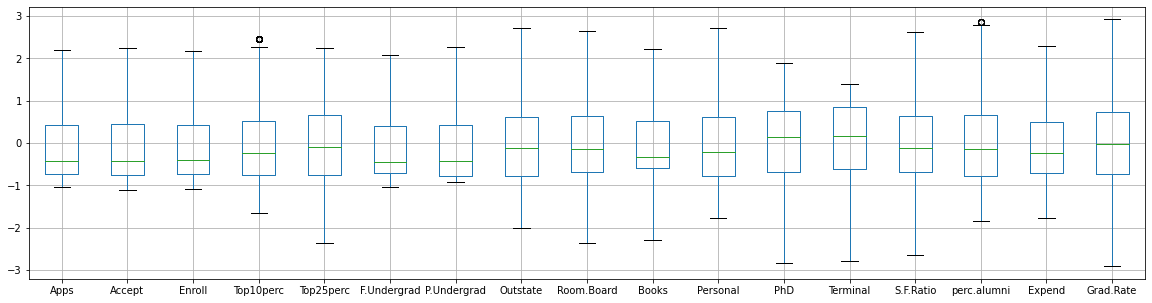

In [57]:
df3.boxplot(figsize=(20,5))

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(df3)
data_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004476,  2.12212752, -0.50151255, ...,  0.32216034,
         1.32596561, -1.42543835],
       ...,
       [-0.36688624,  2.4532119 ,  0.76599685, ...,  0.17522459,
         1.36851658,  0.7209176 ],
       [-0.69747582,  0.99485851, -1.02623665, ...,  0.50404279,
        -0.8227456 ,  1.0518097 ],
       [ 0.71061626, -0.39608317, -0.16531057, ..., -1.45835209,
         1.20132639,  1.07308672]])

In [69]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [117]:
pca.explained_variance_ratio_


array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243])

In [115]:
print(np.cumsum(pca.explained_variance_ratio_))


[0.33266084 0.62021429 0.68638592 0.74536736 0.79660629 0.84159268
 0.8759551 ]


In [112]:
df_pcacomp = pd.DataFrame(pca.components_,columns=list(df3))
df_pcacomp.shape
df_pcacomp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102728,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843


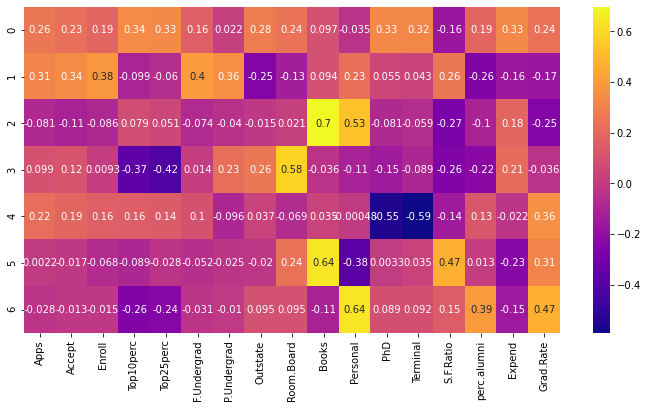

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(df_pcacomp,cmap='plasma',annot=True);

In [58]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s',eig_vals)
print('\n Eigen Vectors \n %s',eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]

 Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

In [128]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp

[33.266083666713335,
 28.755345008170778,
 6.617163554717702,
 5.898143957623844,
 5.1238926723391405,
 4.498638671547009,
 3.436242655665812,
 3.1988471732051984,
 2.4881075492912688,
 2.2383964542420554,
 1.451156777753786,
 0.8651434488112966,
 0.7892466165436445,
 0.5806273152471958,
 0.4387876862119026,
 0.22261871681452053,
 0.1315580751014902]

In [129]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


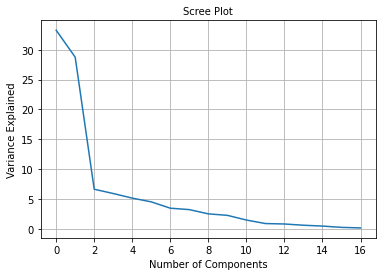

In [125]:
plt.plot(var_exp);
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=10)
plt.grid()
plt.show()

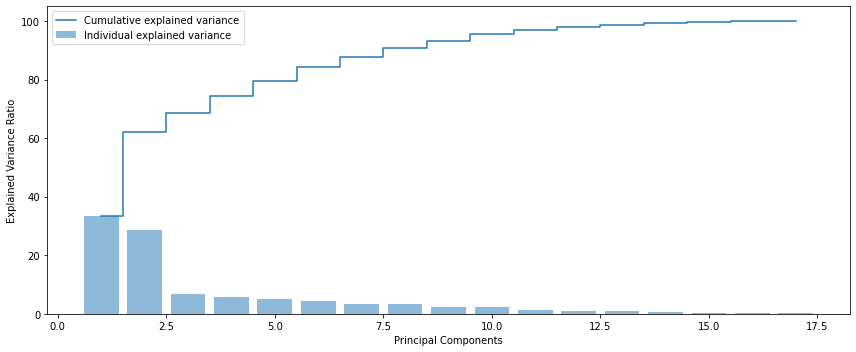

In [74]:
plt.figure(figsize=(12, 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

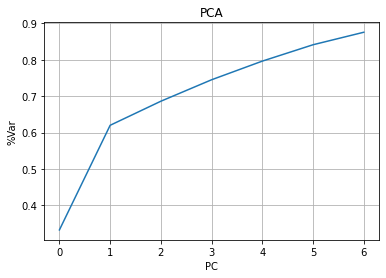

In [132]:
plt.title('PCA')
plt.plot(var)
plt.xlabel('PC')
plt.ylabel('%Var')
plt.grid();